In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os import path
from captchaSplitter import getRegionsFromImage

In [2]:
image_path = "dataset\\sintegrarj\\1cwhi.png"
image = cv2.imread(image_path)

In [3]:
def intersectionArea(a, b):
    (x1, y1, w1, h1) = a
    (x2, y2, w2, h2) = b

    dx = min(x1 + w1, x2 + w2) - max(x1, x2)
    dy = min(y1 + h1, y2 + h2) - max(y1, x2)

    # print(dx, dy, dx*dy)

    if (dx >= 0) and (dy >= 0):
        return dx * dy


In [4]:
def areAnyRegionsOverlapping(regions):
    for (i, region1) in enumerate(regions):
        for (j, region2) in enumerate(regions):
            if i == j:
                continue
            
            area1 = region1[2] * region1[3]
            area2 = region2[2] * region2[3]
            inter = intersectionArea(region1, region2)

            # print(i, region1, j, region2, area1, area2, inter)

            if inter is not None and (area1/inter < 3 or area2/inter < 3):
                return True

    return False

5 5
False


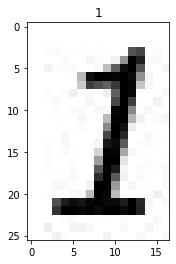

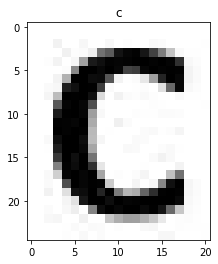

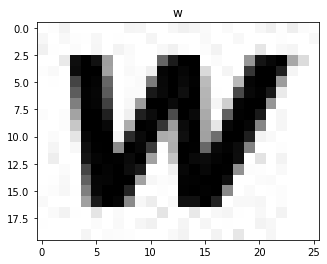

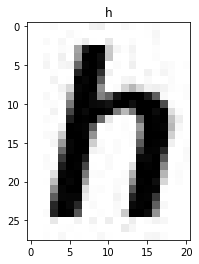

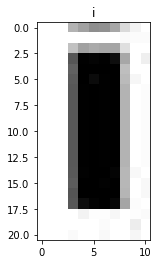

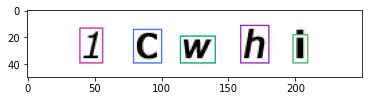

In [7]:
images, regions = getRegionsFromImage(image, margin=3)

labels = path.basename(path.splitext(image_path)[0])

print(len(labels), len(regions))
print(areAnyRegionsOverlapping(regions))

rectangled = image.copy()
for (letter, label, (x,y,w,h)) in zip(images, labels, regions):
    actualHeight, actualWidth = letter.shape

    if len(letter) == 0 or actualWidth == 0 or actualHeight == 0:
        print("Letter skipped")
        continue

    if max(actualHeight, actualWidth)/min(actualHeight, actualWidth) > 3:
        print("Letter skipped due to invalid aspect ratio")
        continue
    
    plt.imshow(letter, cmap="gray")
    plt.title(label)
    plt.show()

    rectangled = cv2.rectangle(rectangled, (x, y), (x + w, y + h), list(np.random.random(size=3) * 256), 1)

plt.imshow(rectangled)